In [6]:
import pandas as pd
f = pd.read_csv('titanic_data.csv')
print(f.shape)

(891, 12)


In [7]:
f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
f.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
import numpy as np
age = f['Age'].values
age = np.reshape(age , (-1,1))

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
imp.fit(age)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [15]:
f['Age'] = imp.transform(age)

In [26]:
f[f['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


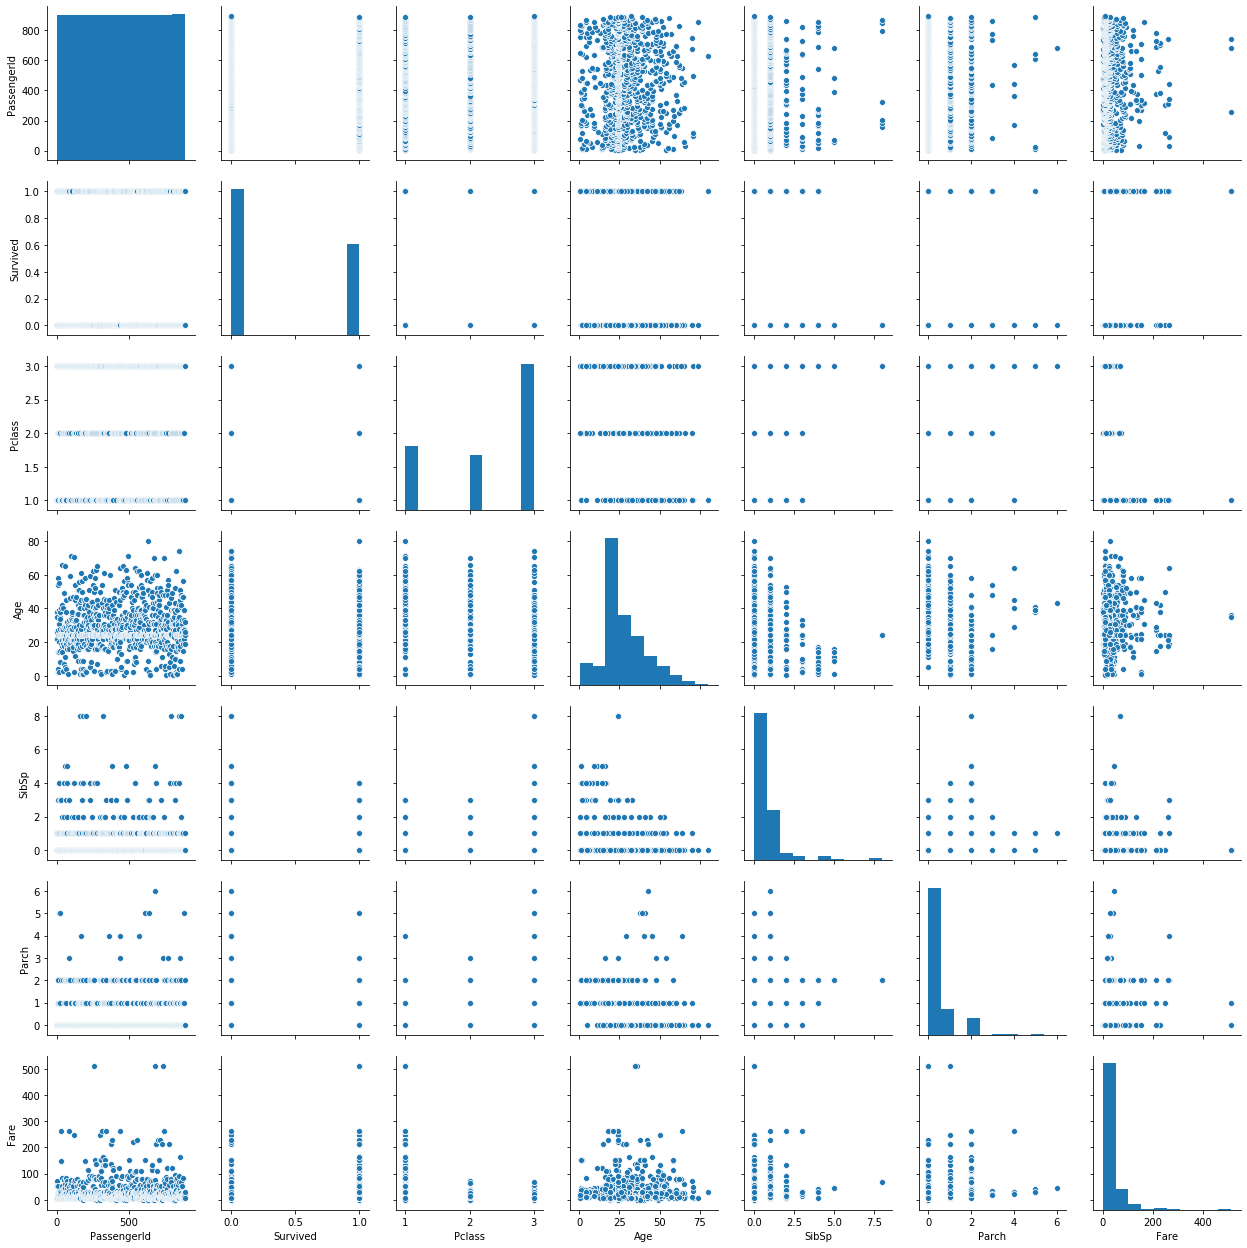

In [29]:
import seaborn as sns
sns.pairplot(data = f)

In [17]:
f.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


In [18]:
X = f[['Pclass','Fare']]
X.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [20]:
y = f['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6940298507462687

In [32]:
jack = lr.predict_proba([[3,0]])
jack

array([[0.75760875, 0.24239125]])

In [33]:
f.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
meanfortest = lr.predict_proba([[2,32.204208]])
richfortest = lr.predict_proba([[1,300]])
print('mean prob surv = ', (meanfortest))
print('rich prob surv = ', (richfortest))

mean prob surv =  [[0.58803257 0.41196743]]
rich prob surv =  [[0.14010399 0.85989601]]


In [51]:
f = pd.concat([f,pd.get_dummies(f['Sex'], prefix='Sex',
                                 dummy_na=True)],axis=1).drop(['Sex'],axis=1)
f.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Sex_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0


In [52]:
X = f[['Pclass','Fare','Sex_female','Sex_male']]
y = f['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7873134328358209

In [57]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print('                 Confusion matrix')
print('                          Survie           Die   ')
print('Actual Survie      %6d' % conf[0,0] + '            %5d' % conf[0,1] )
print('Actual Die          %6d' % conf[1,0] + '            %5d' % conf[1,1] )

                 Confusion matrix
                          Survie           Die   
Actual Survie         133               24
Actual Die              33               78


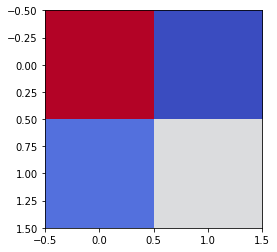

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(conf , cmap = 'coolwarm')

In [59]:
X = f[['Pclass','Fare','Sex_female','Sex_male','Age']]
y = f['Survived']
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('ACC ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC  0.7985074626865671
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.arange(1,10,0.5)}
lr_best = GridSearchCV(lr,parameters, cv=5)
lr_best.fit(X_train,y_train)
lr_best.best_estimator_

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admistrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = lr_best.predict(X_test)
from sklearn.metrics import accuracy_score
print('ACC' ,accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC 0.7985074626865671
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

